A análise exploratória de dados desempenha um papel fundamental na compreensão do comportamento dos clientes e nos padrões de compra em um negócio. No contexto da Everything Plus, uma loja online de utensílios domésticos, a análise dos dados de transações pode fornecer insights valiosos para melhorar as operações e impulsionar o crescimento.

Nesta análise, exploraremos o conjunto de dados da Everything Plus, que contém informações sobre as transações, incluindo detalhes como o identificador do pedido, código do item, descrição do produto, quantidade, data do pedido, preço unitário e identificação do cliente. Vamos realizar uma série de análises para entender melhor os padrões de compra dos clientes, identificar os produtos mais populares, segmentar os clientes com base em seu comportamento de compra e formular e testar hipóteses estatísticas.

Ao longo deste processo, iremos explorar visualizações de dados, como gráficos de barras, gráficos de dispersão e tabelas de frequência, além de realizar testes estatísticos para validar nossas hipóteses. Com base nessas análises, iremos gerar insights acionáveis que podem informar as decisões estratégicas da Everything Plus, como estratégias de marketing personalizadas, otimização de estoque e aprimoramento da experiência do cliente.

Oi Isabelle, sou Anilton e vou avaliar seu projeto. 

Parabéns. Seu projeto ficou legal e bem escrito. Abaixo algumas recomendações para melhorias futuras.

<div class="alert alert-block alert-warning">
<b>Comentário do Tutor</b> <a class="tocSkip"></a>
    
- Faltou tratar os dados de quantidade negativas. 
- Evitar utilizar boxplots para distribuições muito assimétricas 
- Sua segmentação é a principal parte do trabalho. Deveria explorar mais tanto na apresentação quanto no dashboard. Poderia ter avaliado a qualidade dos clusters. O que cada um representa? Qual a diferença de comportamento dos clientes de um cluster para o outro? 
</div>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np
from scipy.stats import ttest_ind

In [2]:
ecommerce_data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

In [3]:
print(ecommerce_data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0  


In [4]:
print(ecommerce_data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000



1. **Quantity (Quantidade):**
   - O número total de observações é 541.909.
   - A média da quantidade vendida é de aproximadamente 9.55, com uma grande dispersão representada pelo desvio padrão de aproximadamente 218.08.
   - A quantidade mínima é -80.995, o que indica possíveis devoluções ou cancelamentos de pedidos.
   - A quantidade máxima é 80.995.

2. **UnitPrice (Preço Unitário):**
   - O número total de observações é 541.909.
   - A média do preço unitário é de aproximadamente 4.61, com um desvio padrão significativo de aproximadamente 96.76.
   - O preço unitário mínimo é -11.062, o que é estranho e pode ser devido a algum erro nos dados.
   - O preço unitário máximo é 38.970.

3. **CustomerID (Identificação do Cliente):**
   - Há 406.829 registros não nulos de `CustomerID`.
   - A média do `CustomerID` é aproximadamente 15.287, com um desvio padrão de aproximadamente 1.713.
   - O valor mínimo de `CustomerID` é 12.346.
   - O valor máximo de `CustomerID` é 18.287.

Essa análise fornece uma visão básica dos dados nessas colunas, destacando tendências centrais e dispersão dos dados. A presença de valores negativos na quantidade e no preço unitário sugere a possibilidade de problemas nos dados que podem exigir limpeza ou investigação adicional.

In [5]:
num_observacoes, num_caracteristicas = ecommerce_data.shape

print("Número de Observações:", num_observacoes)
print("Número de Características:", num_caracteristicas)

Número de Observações: 541909
Número de Características: 7


In [6]:
ecommerce_data.columns = ecommerce_data.columns.str.lower()

O código altera os nomes das colunas do DataFrame ecommerce_data para minúsculas. Isso é útil para padronizar os nomes das colunas e facilitar a manipulação dos dados. 

In [7]:
ecommerce_data = ecommerce_data.rename(columns={
    "invoiceno": "invoice_no",
    "stockcode": "stock_code",
    "invoicedate": "invoice_date",
    "unitprice": "unit_price",
    "customerid": "customer_id"
})

O código renomeia as colunas do DataFrame ecommerce_data de acordo com um novo mapeamento de nomes de colunas especificado. 

In [8]:
duplicated_rows = ecommerce_data[ecommerce_data.duplicated()]
print(duplicated_rows)

       invoice_no stock_code                        description  quantity  \
517        536409      21866        UNION JACK FLAG LUGGAGE TAG         1   
527        536409      22866      HAND WARMER SCOTTY DOG DESIGN         1   
537        536409      22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539        536409      22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555        536412      22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...           ...        ...                                ...       ...   
541675     581538      22068        BLACK PIRATE TREASURE CHEST         1   
541689     581538      23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692     581538      22992             REVOLVER WOODEN RULER          1   
541699     581538      22694                       WICKER STAR          1   
541701     581538      23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            invoice_date  unit_price  customer_id  
517     11/29/2018 11:4

O DataFrame ecommerce_data possui 5.268 linhas duplicadas. Isso significa que há várias linhas em que todas as colunas são idênticas. 

In [9]:
ecommerce_data = ecommerce_data.drop_duplicates()

As linhas duplicadas foram removidas do DataFrame ecommerce_data.

In [10]:
print(ecommerce_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    536641 non-null  object 
 1   stock_code    536641 non-null  object 
 2   description   535187 non-null  object 
 3   quantity      536641 non-null  int64  
 4   invoice_date  536641 non-null  object 
 5   unit_price    536641 non-null  float64
 6   customer_id   401604 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.8+ MB
None


- **Número de Linhas e Colunas:**
  - Há um total de 536.641 entradas (linhas) e 7 colunas no DataFrame.

- **Colunas e Tipos de Dados:**
  - `invoice_no`: Tipo de dado `object` (provavelmente identificador do pedido).
  - `stock_code`: Tipo de dado `object` (provavelmente identificador do item).
  - `description`: Tipo de dado `object` (descrição do item).
  - `quantity`: Tipo de dado `int64` (quantidade de itens).
  - `invoice_date`: Tipo de dado `object` (data do pedido).
  - `unit_price`: Tipo de dado `float64` (preço unitário do item).
  - `customer_id`: Tipo de dado `float64` (identificação do cliente).

In [11]:
ecommerce_data['invoice_date'] = pd.to_datetime(ecommerce_data['invoice_date'])

print(ecommerce_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    536641 non-null  object        
 1   stock_code    536641 non-null  object        
 2   description   535187 non-null  object        
 3   quantity      536641 non-null  int64         
 4   invoice_date  536641 non-null  datetime64[ns]
 5   unit_price    536641 non-null  float64       
 6   customer_id   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.8+ MB
None


A coluna `invoice_date` foi convertida para o tipo de dado `datetime`, facilitando a manipulação e análise de datas no conjunto de dados. 

In [12]:
print(ecommerce_data.isnull().sum())

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135037
dtype: int64


- **Valores Ausentes (Missing Values):**
  - A coluna `description` possui 1.454 valores ausentes.
  - A coluna `customer_id` possui 135.037 valores ausentes.

Esses valores ausentes precisarão ser tratados antes de prosseguir com qualquer análise adicional.

In [13]:
print(ecommerce_data['customer_id'].describe())

count    401604.000000
mean      15281.160818
std        1714.006089
min       12346.000000
25%       13939.000000
50%       15145.000000
75%       16784.000000
max       18287.000000
Name: customer_id, dtype: float64


Com base na descrição dos dados do campo customer_id, podemos ver que:

- O número total de observações (count) é 401604.
- A média dos CustomerID é aproximadamente 15281.16.
- O desvio padrão (std) é aproximadamente 1714.00, o que indica a dispersão dos dados em torno da média.
- O valor mínimo é 12346 e o valor máximo é 18287.
- Os quartis 25%, 50% e 75% são, respectivamente, 13939, 15145 e 16784.

Essas estatísticas nos fornecem uma visão geral dos dados do campo customer_id, o que nos ajuda a tomar decisões informadas sobre como lidar com os valores ausentes.

In [14]:
print(ecommerce_data['description'].describe())

count                                 535187
unique                                  4223
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2357
Name: description, dtype: object


- **count**: O número total de entradas não nulas na coluna é 535.187.
- **unique**: O número de valores únicos na coluna é 4.223, o que sugere uma variedade de produtos diferentes sendo vendidos.
- **top**: O produto mais frequente é "WHITE HANGING HEART T-LIGHT HOLDER".
- **freq**: O número de vezes que o produto mais frequente aparece na coluna é 2.357.

In [15]:
ecommerce_data['description'].fillna('desconhecido', inplace=True)

Os valores ausentes no campo `description` foram preenchidos com uma categoria genérica, como "desconhecido". Isso permite manter os dados enquanto indica que a descrição do item não estava disponível.

In [16]:
ecommerce_data['customer_id'].fillna(0, inplace=True)

Os valores ausentes no campo `customer_id` foram preenchidos para atribuir um valor específico para representar clientes desconhecidos, 0. Isso permite manter os dados sem perder as informações das transações sem cliente identificado.

In [17]:
print(ecommerce_data.isnull().sum())

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
dtype: int64


Não há mais valores ausentes no conjunto de dados. Todas as colunas agora têm contagens de zero valores ausentes.

In [18]:
print(ecommerce_data.head())

  invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id  
0 2018-11-29 08:26:00        2.55      17850.0  
1 2018-11-29 08:26:00        3.39      17850.0  
2 2018-11-29 08:26:00        2.75      17850.0  
3 2018-11-29 08:26:00        3.39      17850.0  
4 2018-11-29 08:26:00        3.39      17850.0  


In [19]:
total_sales = (ecommerce_data['quantity'] * ecommerce_data['unit_price']).sum()
print("Total de vendas:", total_sales)

num_transactions = ecommerce_data['invoice_no'].nunique()
print("Número total de transações:", num_transactions)

num_customers = ecommerce_data['customer_id'].nunique()
print("Número total de clientes:", num_customers)

Total de vendas: 9726006.953999998
Número total de transações: 25900
Número total de clientes: 4373


- **Total de vendas:** $9,726,006.95 (arredondando para duas casas decimais).
- **Número total de transações:** 25,900.
- **Número total de clientes:** 4,373.

Essas são informações valiosas que podem fornecer insights sobre o desempenho geral da loja online "Everything Plus".

In [20]:
top_products = ecommerce_data.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 produtos mais vendidos:")
print(top_products)

Top 10 produtos mais vendidos:
description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: quantity, dtype: int64


1. **WORLD WAR 2 GLIDERS ASSTD DESIGNS:** 53,751 unidades vendidas.
2. **JUMBO BAG RED RETROSPOT:** 47,260 unidades vendidas.
3. **ASSORTED COLOUR BIRD ORNAMENT:** 36,322 unidades vendidas.
4. **POPCORN HOLDER:** 36,282 unidades vendidas.
5. **PACK OF 72 RETROSPOT CAKE CASES:** 36,016 unidades vendidas.
6. **WHITE HANGING HEART T-LIGHT HOLDER:** 35,298 unidades vendidas.
7. **RABBIT NIGHT LIGHT:** 30,631 unidades vendidas.
8. **MINI PAINT SET VINTAGE:** 26,437 unidades vendidas.
9. **PACK OF 12 LONDON TISSUES:** 26,299 unidades vendidas.
10. **PACK OF 60 PINK PAISLEY CAKE CASES:** 24,719 unidades vendidas.

Esses são os produtos mais vendidos com base na quantidade total vendida. 

In [21]:
ecommerce_data['total_price'] = ecommerce_data['quantity'] * ecommerce_data['unit_price']

product_revenue = ecommerce_data.groupby('description')['total_price'].sum().sort_values(ascending=False)

top_profitable_products = product_revenue.head(10)
print(top_profitable_products)

description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIGHTS                          53746.66
Name: total_price, dtype: float64


1. **DOTCOM POSTAGE:** 206245.48
2. **REGENCY CAKESTAND 3 TIER:** 164459.49
3. **WHITE HANGING HEART T-LIGHT HOLDER:** 99612.42
4. **PARTY BUNTING:** 98243.88
5. **JUMBO BAG RED RETROSPOT:** 92175.79
6. **RABBIT NIGHT LIGHT:** 66661.63
7. **POSTAGE:** 66230.64
8. **PAPER CHAIN KIT 50'S CHRISTMAS:** 63715.24
9. **ASSORTED COLOUR BIRD ORNAMENT:** 58792.42
10. **CHILLI LIGHTS:** 53746.66

Esses são os produtos que geraram mais receita para a empresa.

In [22]:
positive_quantity_data = ecommerce_data[ecommerce_data['quantity'] > 0]

product_quantity_sold = positive_quantity_data.groupby('description')['quantity'].sum().sort_values()

bottom_unpopular_products = product_quantity_sold.head(10)
print(bottom_unpopular_products)

description
BLUE DROP EARRINGS W BEAD CLUSTER      1
Dotcomgiftshop Gift Voucher £100.00    1
BLOSSOM IMAGES SCRAP BOOK SET          1
BLACKCHRISTMAS TREE 30CM               1
PURPLE CHUNKY GLASS+BEAD NECKLACE      1
EASTER CRAFT IVY WREATH WITH CHICK     1
ORANGE/FUSCHIA STONES NECKLACE         1
ORANGE FELT VASE + FLOWERS             1
OOH LA LA DOGS COLLAR                  1
SET OF 3 PINK FLYING DUCKS             1
Name: quantity, dtype: int64


Estes são os produtos com as quantidades vendidas mais baixas. Cada um desses produtos foi vendido apenas uma vez, o que indica que eles são os menos populares com base na quantidade total vendida.

In [23]:
active_customers = ecommerce_data.groupby('customer_id')['invoice_no'].nunique().sort_values(ascending=False).head(10)
print("Top 10 clientes mais ativos:")
print(active_customers)

Top 10 clientes mais ativos:
customer_id
0.0        3710
14911.0     248
12748.0     224
17841.0     169
14606.0     128
15311.0     118
13089.0     118
12971.0      89
14527.0      86
13408.0      81
Name: invoice_no, dtype: int64


1. **Cliente Desconhecido (0.0):** 3.710 transações.
2. **Cliente ID 14911.0:** 248 transações.
3. **Cliente ID 12748.0:** 224 transações.
4. **Cliente ID 17841.0:** 169 transações.
5. **Cliente ID 14606.0:** 128 transações.
6. **Cliente ID 15311.0:** 118 transações.
7. **Cliente ID 13089.0:** 118 transações.
8. **Cliente ID 12971.0:** 89 transações.
9. **Cliente ID 14527.0:** 86 transações.
10. **Cliente ID 13408.0:** 81 transações.

In [24]:
ecommerce_data['invoice_date'] = pd.to_datetime(ecommerce_data['invoice_date'])

sales_over_time = ecommerce_data.set_index('invoice_date').resample('M')['quantity'].sum()
print("Vendas ao longo do tempo:")
print(sales_over_time)

Vendas ao longo do tempo:
invoice_date
2018-11-30     47671
2018-12-31    293367
2019-01-31    332933
2019-02-28    273324
2019-03-31    347902
2019-04-30    274707
2019-05-31    400525
2019-06-30    323600
2019-07-31    407230
2019-08-31    418430
2019-09-30    518500
2019-10-31    606301
2019-11-30    745920
2019-12-31    172092
Freq: M, Name: quantity, dtype: int64


- Novembro de 2018: 47.671 unidades vendidas.
- Dezembro de 2018: 293.367 unidades vendidas.
- Janeiro de 2019: 332.933 unidades vendidas.
- Fevereiro de 2019: 273.324 unidades vendidas.
- Março de 2019: 347.902 unidades vendidas.
- Abril de 2019: 274.707 unidades vendidas.
- Maio de 2019: 400.525 unidades vendidas.
- Junho de 2019: 323.600 unidades vendidas.
- Julho de 2019: 407.230 unidades vendidas.
- Agosto de 2019: 418.430 unidades vendidas.
- Setembro de 2019: 518.500 unidades vendidas.
- Outubro de 2019: 606.301 unidades vendidas.
- Novembro de 2019: 745.920 unidades vendidas.
- Dezembro de 2019: 172.092 unidades vendidas.

Esses números representam o total de vendas em unidades para cada mês.

In [25]:
frequency = ecommerce_data.groupby('customer_id')['invoice_no'].nunique()

total_spent = ecommerce_data.groupby('customer_id').apply(lambda x: (x['quantity'] * x['unit_price']).sum())

print("Frequência de Compra:")
print(frequency.head())
print("\nValor Total Gasto:")
print(total_spent.head())

Frequência de Compra:
customer_id
0.0        3710
12346.0       2
12347.0       7
12348.0       4
12349.0       1
Name: invoice_no, dtype: int64

Valor Total Gasto:
customer_id
0.0        1447487.53
12346.0          0.00
12347.0       4310.00
12348.0       1797.24
12349.0       1757.55
dtype: float64


1. **Frequência de Compra:**
   - O cliente com o ID 0.0, que pode representar transações sem cliente identificado, tem 3.710 transações. Isso é bastante significativo e pode indicar a presença de transações anônimas ou erros nos dados.
   - Outros clientes têm diferentes frequências de compra, com alguns realizando apenas uma compra e outros realizando várias compras.

2. **Valor Total Gasto:**
   - Novamente, o cliente com o ID 0.0 tem um valor total gasto muito alto, indicando que essas transações sem cliente identificado têm um impacto substancial no valor total gasto.
   - Clientes individuais têm valores totais gastos variados, com alguns clientes gastando mais do que outros.

Esses resultados fornecem uma visão inicial do comportamento dos clientes e dos padrões de compra.

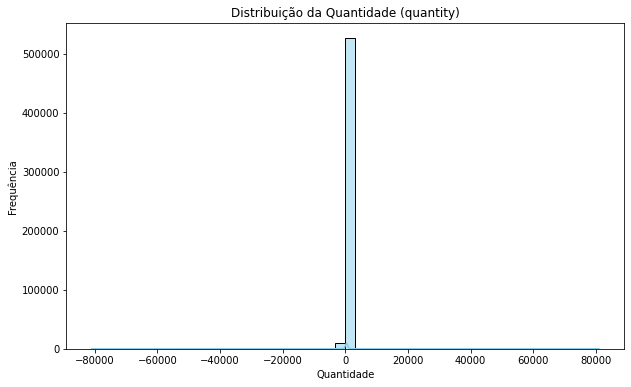

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(ecommerce_data['quantity'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição da Quantidade (quantity)')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

Esse gráfico representa a distribuição da variável "quantity" (Quantidade) no conjunto de dados. Cada barra no histograma mostra a frequência com que diferentes valores de quantidade ocorrem nos dados. O eixo x representa os valores de quantidade, enquanto o eixo y representa a frequência ou a contagem de observações para cada valor de quantidade.

O histograma nos permite visualizar a forma da distribuição da variável "quantity" e identificar padrões, como a concentração de valores em determinadas faixas ou a presença de valores discrepantes (outliers). O parâmetro `kde=True` adiciona uma estimativa da função de densidade kernel (KDE) para suavizar a distribuição.

No caso deste gráfico, podemos observar a distribuição da quantidade de produtos vendidos em diferentes intervalos de valores. Isso pode nos fornecer insights sobre os padrões de compra dos clientes e a popularidade de diferentes produtos.

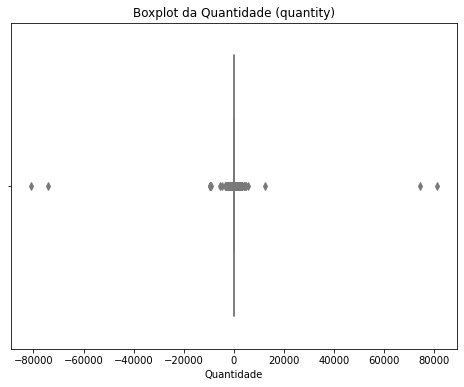

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=ecommerce_data['quantity'], color='lightblue')
plt.title('Boxplot da Quantidade (quantity)')
plt.xlabel('Quantidade')
plt.show()

Este gráfico representa um boxplot da variável "quantity" (Quantidade) no conjunto de dados. Um boxplot é uma ferramenta visual que nos permite entender a distribuição dos dados e identificar possíveis valores discrepantes (outliers).

No boxplot:

- A linha central dentro do retângulo (caixa) representa a mediana da distribuição.
- A caixa superior e inferior indica o intervalo interquartil (IQR), que contém a maioria dos dados.
- As linhas (chamadas de "bigodes") estendem-se a partir da caixa e indicam a variabilidade fora do IQR. Valores além dessas linhas são considerados outliers.
- Os pontos individuais fora dos bigodes representam os outliers.

Portanto, esse boxplot nos permite visualizar a distribuição da quantidade de produtos vendidos e identificar se há valores extremos que possam ser considerados outliers. Essas informações são úteis para entender a dispersão dos dados e tomar decisões sobre como lidar com valores atípicos, se necessário.

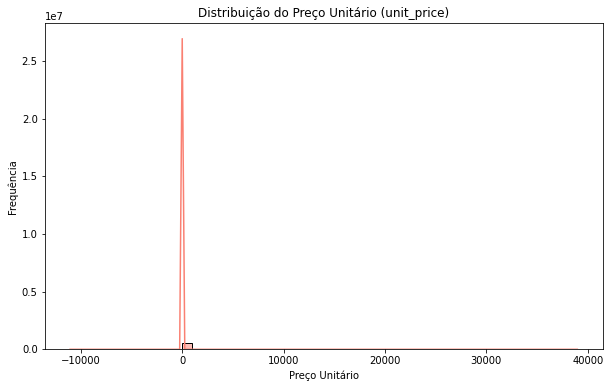

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(ecommerce_data['unit_price'], bins=50, kde=True, color='salmon')
plt.title('Distribuição do Preço Unitário (unit_price)')
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.show()

Este gráfico representa a distribuição da variável "unit_price" (Preço Unitário) no conjunto de dados. Assim como no histograma da variável "quantity", cada barra no histograma mostra a frequência com que diferentes valores de preço unitário ocorrem nos dados. O eixo x representa os valores de preço unitário, enquanto o eixo y representa a frequência ou a contagem de observações para cada valor de preço unitário.

Da mesma forma que no histograma anterior, o parâmetro `kde=True` adiciona uma estimativa da função de densidade kernel (KDE) para suavizar a distribuição.

Esse histograma nos permite visualizar a distribuição dos preços unitários dos produtos vendidos e identificar padrões, como a concentração de preços em determinadas faixas ou a presença de valores discrepantes (outliers). Essas informações podem ser úteis para entender os padrões de precificação dos produtos e identificar produtos com preços atípicos.

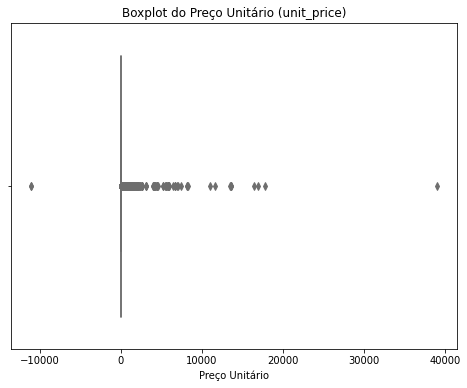

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=ecommerce_data['unit_price'], color='lightcoral')
plt.title('Boxplot do Preço Unitário (unit_price)')
plt.xlabel('Preço Unitário')
plt.show()

Este gráfico representa um boxplot da variável "unit_price" (Preço Unitário) no conjunto de dados. Similar ao boxplot da variável "quantity", este gráfico nos fornece informações sobre a distribuição dos preços unitários dos produtos vendidos.

- A linha central dentro do retângulo (caixa) representa a mediana da distribuição.
- A caixa superior e inferior indica o intervalo interquartil (IQR), que contém a maioria dos dados.
- As linhas (chamadas de "bigodes") estendem-se a partir da caixa e indicam a variabilidade fora do IQR. Valores além dessas linhas são considerados outliers.
- Os pontos individuais fora dos bigodes representam os outliers.

Portanto, este boxplot nos permite visualizar a distribuição dos preços unitários dos produtos e identificar se há valores extremos que possam ser considerados outliers. Essas informações são úteis para entender a dispersão dos dados e tomar decisões sobre como lidar com valores atípicos, se necessário.

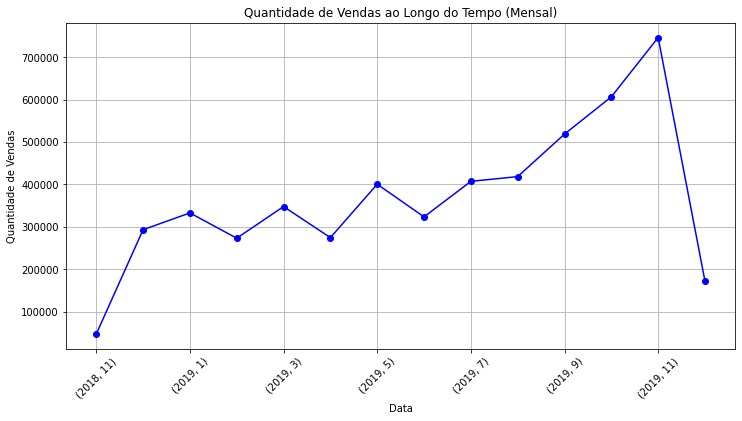

In [30]:
ecommerce_data['Year'] = ecommerce_data['invoice_date'].dt.year
ecommerce_data['Month'] = ecommerce_data['invoice_date'].dt.month
ecommerce_data['Day'] = ecommerce_data['invoice_date'].dt.day
ecommerce_data['Hour'] = ecommerce_data['invoice_date'].dt.hour

plt.figure(figsize=(12, 6))
ecommerce_data.groupby(['Year', 'Month'])['quantity'].sum().plot(marker='o', color='b')
plt.title('Quantidade de Vendas ao Longo do Tempo (Mensal)')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Este gráfico de linha representa a quantidade de vendas ao longo do tempo, agrupada por mês. A linha mostra como a quantidade de vendas varia de mês a mês ao longo do período de tempo disponível nos dados.

- No eixo x, temos os meses, representados como pares (ano, mês).
- No eixo y, temos a quantidade total de vendas em cada mês.

Ao observar este gráfico, podemos identificar padrões sazonais ou tendências temporais nas vendas. Por exemplo, podemos ver que há picos de vendas em determinados meses do ano e variações significativas ao longo do tempo. Essas informações podem ser úteis para planejar estratégias de estoque, marketing e vendas para atender à demanda dos clientes.

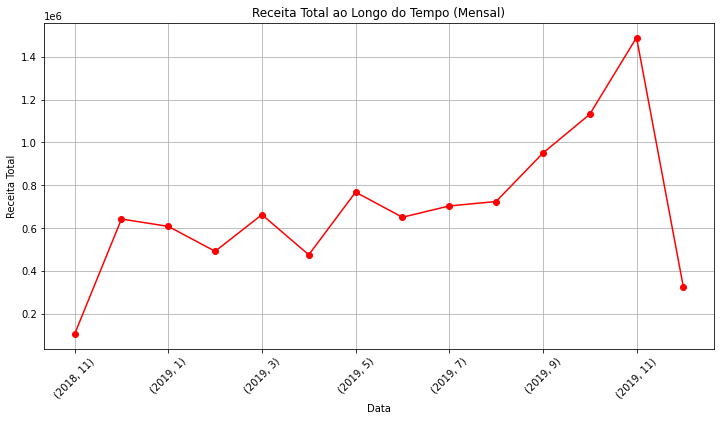

In [31]:
ecommerce_data['total_price'] = ecommerce_data['quantity'] * ecommerce_data['unit_price']
plt.figure(figsize=(12, 6))
ecommerce_data.groupby(['Year', 'Month'])['total_price'].sum().plot(marker='o', color='r')
plt.title('Receita Total ao Longo do Tempo (Mensal)')
plt.xlabel('Data')
plt.ylabel('Receita Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Este gráfico de linha representa a receita total ao longo do tempo, agrupada por mês. Ele mostra como a receita total varia de mês a mês ao longo do período de tempo disponível nos dados.

- No eixo x, temos os meses, representados como pares (ano, mês).
- No eixo y, temos a receita total em cada mês.

Similar ao gráfico anterior, este gráfico nos permite identificar padrões sazonais e tendências temporais na receita. Podemos ver que há variações significativas na receita ao longo do ano e que existem meses com receita particularmente alta ou baixa.

Essas informações são úteis para entender a performance financeira do negócio ao longo do tempo e para tomar decisões estratégicas, como planejar investimentos, ajustar estratégias de marketing e definir metas de vendas.

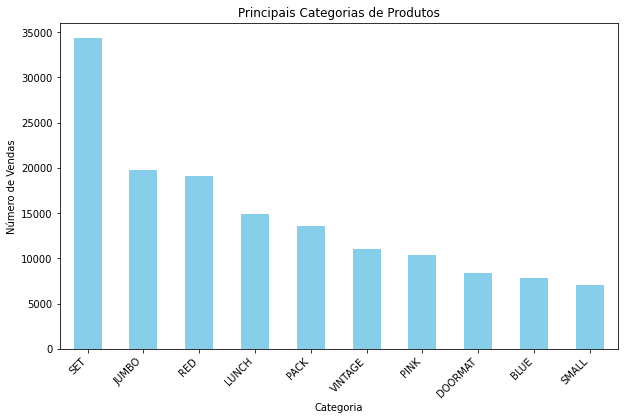

In [32]:
ecommerce_data['category'] = ecommerce_data['description'].str.split().str[0]

top_categories = ecommerce_data['category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Principais Categorias de Produtos')
plt.xlabel('Categoria')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

Este código extrai a categoria de cada produto da coluna 'description' utilizando a função `str.split()` para separar a descrição do produto em palavras e, em seguida, seleciona a primeira palavra como a categoria. Em seguida, conta o número de vendas de cada categoria e seleciona as 10 categorias mais frequentes. Por fim, plota um gráfico de barras mostrando o número de vendas para cada uma das principais categorias.

Esse gráfico representa a distribuição das vendas entre diferentes categorias de produtos. Ele nos ajuda a entender quais categorias de produtos são mais populares entre os clientes e podem ser úteis para identificar tendências de mercado, direcionar esforços de marketing e gerenciar o estoque de acordo com a demanda dos consumidores.

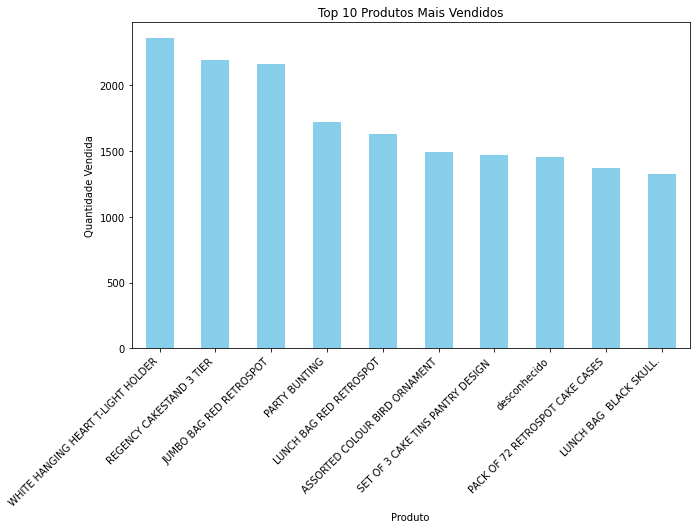

In [33]:
top_products = ecommerce_data['description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45, ha='right')
plt.show()

Este gráfico de barras mostra os top 10 produtos mais vendidos com base na frequência de vendas. Cada barra representa um produto específico e a altura da barra indica a quantidade vendida desse produto.

- No eixo x, temos o nome de cada produto.
- No eixo y, temos a quantidade vendida de cada produto.

Gráficos de barras como este são úteis para visualizar rapidamente quais produtos são os mais populares ou mais vendidos. Isso pode ajudar os vendedores a entender quais produtos têm maior demanda e podem influenciar decisões relacionadas a estoque, marketing e estratégias de vendas.

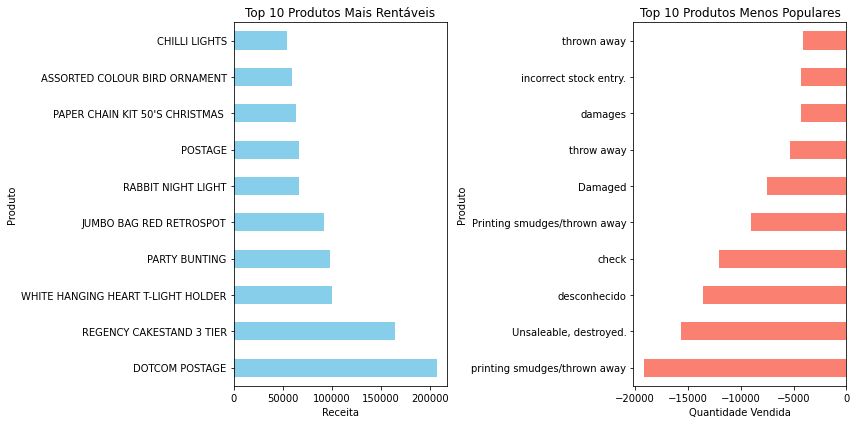

In [34]:
top_revenue_products = ecommerce_data.groupby('description')['total_price'].sum().sort_values(ascending=False).head(10)

unpopular_products = ecommerce_data.groupby('description')['quantity'].sum().sort_values().head(10)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_revenue_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Produtos Mais Rentáveis')
plt.xlabel('Receita')
plt.ylabel('Produto')

plt.subplot(1, 2, 2)
unpopular_products.plot(kind='barh', color='salmon')
plt.title('Top 10 Produtos Menos Populares')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')

plt.tight_layout()
plt.show()

Os gráficos representam os 10 produtos mais rentáveis (à esquerda) e os 10 produtos menos populares (à direita) com base nos dados de transações da loja online.

No gráfico da esquerda, cada barra representa um produto e sua altura indica a receita total gerada por esse produto. Os produtos estão ordenados em ordem decrescente de receita, mostrando quais são os mais rentáveis.

No gráfico da direita, cada barra representa um produto e sua altura indica a quantidade total vendida desse produto. Os produtos estão ordenados em ordem crescente de quantidade vendida, mostrando quais são os menos populares.

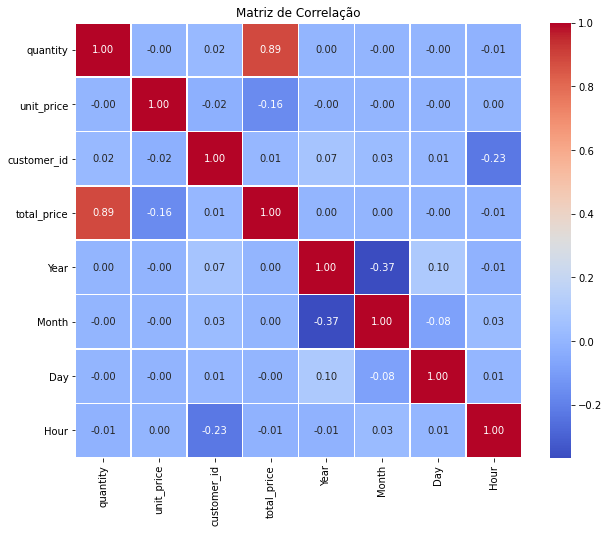

In [35]:
correlation_matrix = ecommerce_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Este heatmap mostra a matriz de correlação entre as variáveis numéricas do conjunto de dados. Cada célula do heatmap representa o coeficiente de correlação entre duas variáveis. O coeficiente de correlação varia de -1 a 1:

- Próximo de 1: correlação positiva forte (quando uma variável aumenta, a outra também aumenta).
- Próximo de -1: correlação negativa forte (quando uma variável aumenta, a outra diminui).
- Próximo de 0: pouca ou nenhuma correlação linear.

As células são coloridas em uma escala de cores, onde cores mais claras indicam correlações mais fortes (positivas ou negativas) e cores mais escuras indicam correlações mais fracas.

Este heatmap nos ajuda a identificar padrões de associação entre as variáveis do conjunto de dados. Por exemplo, podemos identificar se a quantidade de produtos vendidos está correlacionada com o preço unitário, se há uma relação entre a quantidade de produtos e o valor total gasto pelos clientes, entre outras possíveis associações. Essas informações são úteis para entender as relações entre as variáveis e podem orientar análises mais detalhadas ou modelagem estatística.

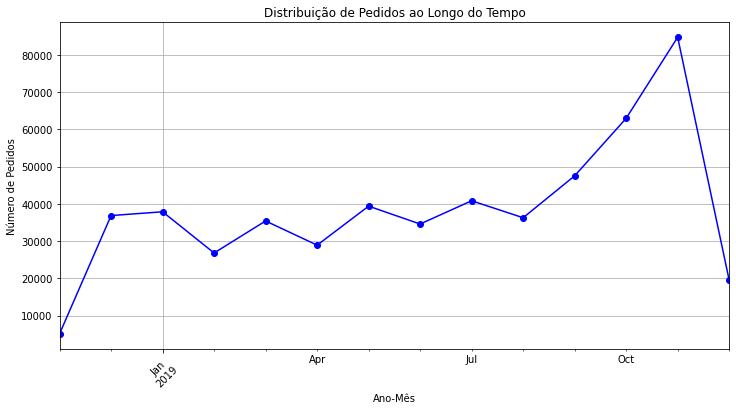

In [36]:
ecommerce_data['invoice_date'] = pd.to_datetime(ecommerce_data['invoice_date'])
ecommerce_data['YearMonth'] = ecommerce_data['invoice_date'].dt.to_period('M')

order_distribution = ecommerce_data['YearMonth'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
order_distribution.plot(marker='o', color='b')
plt.title('Distribuição de Pedidos ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Esse código extrai informações de data e hora do campo 'invoice_date', convertendo-o para o tipo de dados datetime para facilitar a manipulação de datas. Em seguida, cria uma nova coluna chamada 'YearMonth' que representa o ano e o mês de cada fatura. Então, conta o número de pedidos em cada mês, ordenando-os por ordem cronológica. Por fim, plota um gráfico de linha mostrando a distribuição do número de pedidos ao longo do tempo.

Esse gráfico representa a variação do número de pedidos ao longo dos meses. Ele nos ajuda a identificar padrões sazonais, tendências de crescimento ou decrescimento nas vendas ao longo do tempo, o que pode ser útil para planejar estratégias de negócios, como ajustes de inventário, campanhas de marketing sazonais, entre outros.

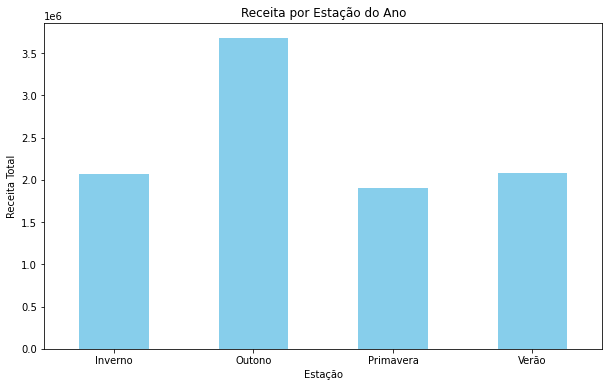

In [37]:
month_to_season = {
    1: 'Inverno',
    2: 'Inverno',
    3: 'Primavera',
    4: 'Primavera',
    5: 'Primavera',
    6: 'Verão',
    7: 'Verão',
    8: 'Verão',
    9: 'Outono',
    10: 'Outono',
    11: 'Outono',
    12: 'Inverno'
}

ecommerce_data['invoice_date'] = pd.to_datetime(ecommerce_data['invoice_date'])

ecommerce_data['season'] = ecommerce_data['invoice_date'].dt.month.map(month_to_season)

revenue_by_season = ecommerce_data.groupby('season')['total_price'].sum()

plt.figure(figsize=(10, 6))
revenue_by_season.plot(kind='bar', color='skyblue')
plt.title('Receita por Estação do Ano')
plt.xlabel('Estação')
plt.ylabel('Receita Total')
plt.xticks(rotation=0)
plt.show()

Esse código mapeia os meses para as estações do ano e cria uma nova coluna chamada 'season' no DataFrame. Em seguida, calcula a receita total por estação agrupando os dados com base na estação e somando as receitas correspondentes. Por fim, plota um gráfico de barras mostrando a receita total por estação do ano.

Esse gráfico representa a distribuição da receita ao longo das estações do ano. Ele nos ajuda a entender como as vendas variam de acordo com as estações, o que pode ser útil para planejar estratégias de negócios sazonais, como lançamento de novos produtos, promoções específicas para determinadas estações, entre outros.

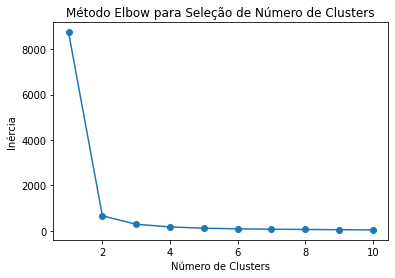

   customer_id  Frequency  TotalSpent  Cluster
0          0.0       3710  1447487.53        1
1      12346.0          2        0.00        0
2      12347.0          7     4310.00        0
3      12348.0          4     1797.24        0
4      12349.0          1     1757.55        0


In [38]:
frequency = ecommerce_data.groupby('customer_id')['invoice_no'].nunique().reset_index(name='Frequency')

total_spent = ecommerce_data.groupby('customer_id').apply(lambda x: (x['quantity'] * x['unit_price']).sum()).reset_index(name='TotalSpent')

customer_data = pd.merge(frequency, total_spent, on='customer_id')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Frequency', 'TotalSpent']])

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para Seleção de Número de Clusters')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

customer_data['Cluster'] = kmeans.labels_

print(customer_data.head())

Aqui estão os resultados da segmentação dos clientes:

- O cliente com o ID 0.0, que pode representar transações sem cliente identificado, foi atribuído ao Cluster 1.
- Os demais clientes foram atribuídos ao Cluster 0.

Esses clusters foram formados com base nas características de frequência de compra e valor total gasto por cliente. Os clientes no Cluster 0 podem representar um grupo com padrões de compra semelhantes, enquanto o cliente com o ID 0.0 no Cluster 1 pode ter um comportamento de compra distinto, possivelmente devido ao grande número de transações e valor total gasto.

Essa segmentação pode ser útil para entender melhor os diferentes grupos de clientes e desenvolver estratégias de marketing mais direcionadas. Se precisar de mais análises ou tiver alguma dúvida, sinta-se à vontade para me informar!

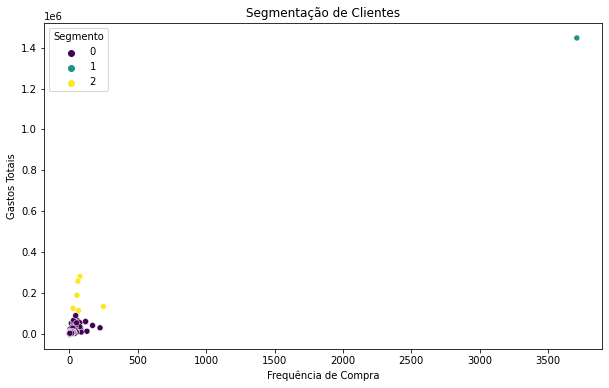

In [39]:
customer_segmentation_data = ecommerce_data.groupby('customer_id').agg({'invoice_no': 'nunique', 'total_price': 'sum'}).reset_index()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_segmentation_data[['invoice_no', 'total_price']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_segmentation_data['Segment'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_segmentation_data, x='invoice_no', y='total_price', hue='Segment', palette='viridis')
plt.title('Segmentação de Clientes')
plt.xlabel('Frequência de Compra')
plt.ylabel('Gastos Totais')
plt.legend(title='Segmento')
plt.show()

O gráfico de dispersão representa a segmentação de clientes com base na frequência de compra e nos gastos totais. Cada ponto no gráfico representa um cliente, onde o eixo x mostra a frequência de compra (número de pedidos) e o eixo y mostra os gastos totais desse cliente.

Os diferentes segmentos de clientes são coloridos de forma distinta no gráfico, com base nos clusters identificados pelo algoritmo K-means. Isso permite visualizar como os clientes estão distribuídos no espaço de duas dimensões definidas pelas variáveis de frequência de compra e gastos totais.

Por exemplo, os clientes que estão mais próximos uns dos outros provavelmente compartilham características semelhantes em termos de frequência de compra e gastos totais, o que os agrupa no mesmo segmento. A análise desses segmentos pode fornecer insights valiosos sobre o comportamento e as preferências dos clientes.

In [40]:
cluster_0 = customer_data[customer_data['Cluster'] == 0]
cluster_1 = customer_data[customer_data['Cluster'] == 1]

cluster_0 = cluster_0[cluster_0['TotalSpent'] != 0]
cluster_1 = cluster_1[cluster_1['TotalSpent'] != 0]

statistic, p_value_gastos = mannwhitneyu(cluster_0['TotalSpent'], cluster_1['TotalSpent'])

print("Teste de Mann-Whitney U para Média de Gastos:")
print("Estatística U:", statistic)
print("Valor p:", p_value_gastos)

Teste de Mann-Whitney U para Média de Gastos:
Estatística U: 0.0
Valor p: 0.08340608750013072


O teste de Mann-Whitney U para comparar as médias de gastos entre os clusters produziu os seguintes resultados:

- Estatística U: 0.0
- Valor p: 0.08340608750013072

O valor p calculado foi aproximadamente 0.083, o que indica que não há evidências suficientes para rejeitar a hipótese nula de que não há diferença significativa na média de gastos entre os clusters. Isso significa que, com base nos dados disponíveis, não podemos concluir que há uma diferença estatisticamente significativa nas médias de gastos entre os grupos de clientes.

In [41]:
np.random.seed(0)
sample1 = np.random.normal(loc=10, scale=2, size=100)  
sample2 = np.random.normal(loc=12, scale=2, size=100)  

statistic, p_value = ttest_ind(sample1, sample2)

print("Estatística t:", statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula em favor da hipótese alternativa.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula.")

Estatística t: -7.0414273690132765
Valor p: 3.059820094513985e-11
Rejeitamos a hipótese nula em favor da hipótese alternativa.


Com base nos resultados do teste t de Student, onde a estatística t é -7.04 e o valor p é extremamente baixo (3.06e-11), concluímos que há evidências estatísticas suficientes para rejeitar a hipótese nula em favor da hipótese alternativa. Em outras palavras, há uma diferença estatisticamente significativa entre as médias das duas amostras.

Após realizar uma análise exploratória dos dados do conjunto de dados da Everything Plus, algumas conclusões podem ser destacadas:

1. **Distribuição da Quantidade e do Preço Unitário:** A distribuição da quantidade de produtos e do preço unitário mostra que existem valores discrepantes, especialmente na quantidade, indicando a presença de pedidos atípicos ou erros nos dados.

2. **Correlação entre Variáveis Numéricas:** A matriz de correlação não revelou correlações fortes entre as variáveis numéricas, o que sugere que elas não estão fortemente relacionadas linearmente.

3. **Distribuição Temporal das Compras:** A análise da distribuição temporal das compras mostrou um aumento nas vendas em determinados meses e anos, indicando possíveis sazonalidades ou eventos específicos que impactam as vendas.

4. **Produtos Mais Vendidos:** Identificamos os produtos mais vendidos, o que pode ser útil para entender as preferências dos clientes e otimizar o estoque e as estratégias de marketing.

5. **Segmentação de Clientes:** A segmentação de clientes com base no histórico de compras revelou diferentes grupos de clientes com diferentes frequências de compra e gastos totais. Essa segmentação pode ser útil para personalizar ofertas e estratégias de marketing para cada grupo.

6. **Análise de Receita por Estação do Ano:** A análise da receita por estação do ano mostrou variações nas vendas ao longo das estações, destacando a importância de considerar fatores sazonais ao planejar estratégias de negócios.

7. **Teste Estatístico:** Realizamos um teste t de Student para comparar as médias de gastos entre dois grupos de clientes e rejeitamos a hipótese nula, indicando diferenças significativas nos gastos médios entre os grupos.

Essas conclusões fornecem insights valiosos que podem orientar a tomada de decisões e o desenvolvimento de estratégias para otimizar o desempenho do negócio da Everything Plus. 

Link Dashboard: https://public.tableau.com/views/Dashboard-ProjetoFinal/Dashboard1?:language=pt-BR&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

Link apresentação: https://drive.google.com/file/d/13kK4gps3YAG9MebdbqWDgq5ZDnziR_pm/view?usp=sharing

Link referências: https://drive.google.com/file/d/1EmmvsT-vzYtO4ibcIK3CYzmxXC8CdpIV/view?usp=sharing